In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import lasagne
import theano
import theano.tensor as T
from lasagne.layers import *
from lasagne.nonlinearities import rectify, sigmoid, linear, tanh
import scipy.stats as st
import seaborn as sns
from scipy import stats
from IPython import display
%matplotlib inline

In [2]:
G_input = T.matrix()
G_l1 = lasagne.layers.InputLayer((None ,2),G_input)

G_l2 = lasagne.layers.DenseLayer(G_l1, num_units=100, nonlinearity = lasagne.nonlinearities.tanh)

G_l3 = lasagne.layers.DenseLayer(G_l2, num_units=100, nonlinearity = lasagne.nonlinearities.tanh)

G_l4 = lasagne.layers.DenseLayer(G_l3, num_units=100, nonlinearity = lasagne.nonlinearities.tanh)

G= lasagne.layers.DenseLayer(G_l4, num_units=2, nonlinearity = None)

G_output = lasagne.layers.get_output(G)
G_weights = lasagne.layers.get_all_params(G)
print (G_weights)

[W, b, W, b, W, b, W, b]


In [3]:
# discriminators
D1_input = T.matrix()
D1_l1 = lasagne.layers.InputLayer((None, 2), D1_input)
D1_l2 = lasagne.layers.DenseLayer(D1_l1, 100, nonlinearity=tanh)
D1_l3 = lasagne.layers.DenseLayer(D1_l2, 100, nonlinearity=tanh)
D1 = lasagne.layers.DenseLayer(D1_l3, 2, nonlinearity=tanh)

D2_l1 = lasagne.layers.InputLayer((None, 2), G_output)
D2_l2 = lasagne.layers.DenseLayer(D2_l1, 100, nonlinearity=tanh)
D2_l3 = lasagne.layers.DenseLayer(D2_l2, 100, nonlinearity=tanh)
D2 = lasagne.layers.DenseLayer(D2_l3, 2, nonlinearity=tanh)

D1_output = lasagne.layers.get_output(D1)
D2_output = lasagne.layers.get_output(D2)
D1_weights = lasagne.layers.get_all_params(D1)
D2_weights = lasagne.layers.get_all_params(D2)

In [4]:
G_loss = -T.log(D2_output).mean()
D_loss = (-T.log(D1_output) - T.log(1-D2_output)).mean()

In [5]:
G_updates = lasagne.updates.sgd(G_loss, G_weights, 0.001)
G_train = theano.function([G_input], G_loss, updates = G_updates)
D_updates = lasagne.updates.sgd(D_loss, D1_weights, 0.001)
D_train = theano.function([D1_input, G_input], D_loss, updates = D_updates)
G_eval = theano.function([G_input], G_output)

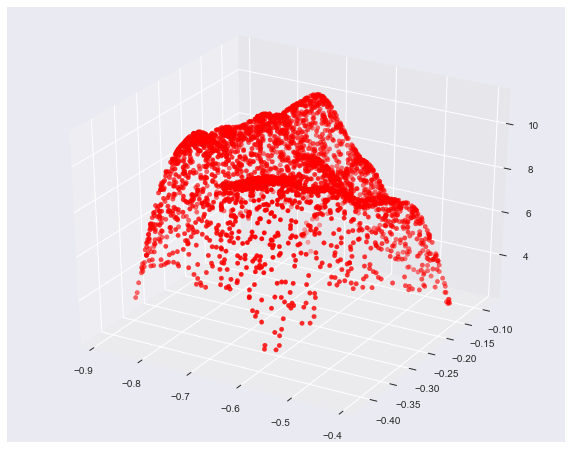

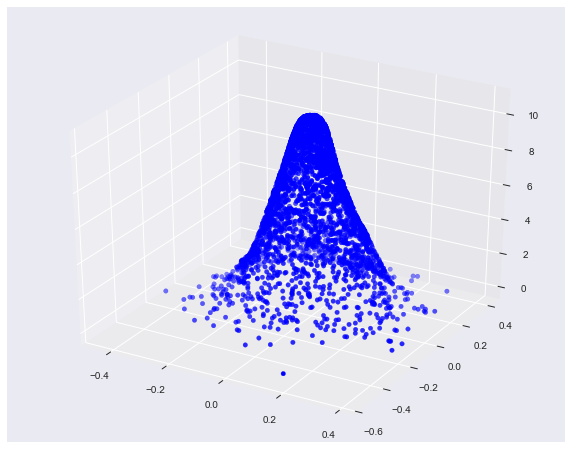

In [6]:
for i in range(20):
    for j in range(10):
        Z = np.random.random((3000,2))
        X = np.random.normal(size = (3000,2))*0.12
        D_train(Z, X)
        
    Z = np.random.random((3000,2))
    G_train(Z)
    
    T = G_eval(Z)
    
    G_kde = stats.gaussian_kde(np.vstack([T[:,0],T[:,1]]))(np.vstack([T[:,0], T[:,1]]))
    
    
    X_kde = stats.gaussian_kde(np.vstack([X[:,0], X[:,1]]))(np.vstack([X[:,0], X[:,1]]))
    
    
    display.clear_output(wait=True)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(T[:,0], T[:,1], G_kde, color = 'red' )
    plt.show()
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], X_kde, color = 'blue')
    plt.show()
